In [41]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [17]:
raw_data = pd.read_csv("raw_data.csv")
raw_data

,id,mean_count_of_orders,mean_sum_of_price,mean_sum_of_duration,mean_sum_of_distance,mean_count_of_offers
0,5910568,"[0.255319, 0.510639, 0.404255, 3.333333, 2.111...","[80425.531915, 208297.87234, 99148.936171, 957...","[5.553191, 13.510638, 6.12766, 63.444445, 48.6...","[2501.531915, 5822.085107, 2857.191489, 35218....","[2.042553, 4.8723410000000005, 1.765957, 19.22..."
1,1287111,"[0.0, 0.12766, 0.06383, 0.0, 0.0, 0.0]","[0.0, 24468.085106, 16808.510638, 0.0, 0.0, 0.0]","[0.0, 1.489362, 15.93617, 0.0, 0.0, 0.0]","[0.0, 319.212766, 299.12766, 0.0, 0.0, 0.0]","[0.0, 4.468085, 0.851064, 0.0, 0.0, 0.0]"
2,1938268,"[4.234042, 6.063829, 0.0, 0.0, 0.0, 0.0]","[847659.574467, 1223617.021276, 0.0, 0.0, 0.0,...","[39.914894, 54.787233, 0.0, 0.0, 0.0, 0.0]","[12084.000001, 16794.12766, 0.0, 0.0, 0.0, 0.0]","[84.170214, 118.68085, 0.0, 0.0, 0.0, 0.0]"
3,2259894,"[1e-06, 0.042554, 0.0, 0.111111, 0.0, 0.0]","[0.0, 12978.723404, 0.0, 17777.777778, 0.0, 0.0]","[1e-06, 0.93617, 0.0, 1.0, 0.0, 0.0]","[0.0, 211.148935, 0.0, 463.444444, 0.0, 0.0]","[0.0, 0.191489, 0.0, 0.444444, 0.0, 0.0]"
4,5971842,"[0.255319, 0.787234, 0.446809, 0.0, 1.444444, ...","[50000.0, 125106.382978, 85957.446808, 0.0, 23...","[3.0, 7.74468, 5.829786, 0.0, 13.666667, 9.111...","[1232.74468, 2700.787234, 2394.170213, 0.0, 46...","[1.1063830000000001, 3.914893, 2.638299, 0.0, ..."
...,...,...,...,...,...,...
92578,1584042,"[3.042553, 0.999999, 0.851065, 0.222222, 0.111...","[1381276.595744, 612127.659573, 462765.957447,...","[45.063829, 22.404255, 14.340425, 3.333334, 2....","[16027.93617, 7225.617021, 5826.446808, 1883.2...","[26.553192, 17.702127, 13.595744, 0.888889, 0...."
92579,1105213,"[0.914894, 0.021277, 0.0, 0.444444, 0.0, 0.0]","[394468.085107, 9361.702128, 0.0, 221111.11111...","[15.659574, 0.382979, 0.0, 8.333333, 0.0, 0.0]","[6027.12766, 108.212766, 0.0, 5438.888889, 0.0...","[19.382979, 0.255319, 0.0, 11.222222, 0.0, 0.0]"
92580,5880452,"[0.12766, 0.12766, 1.148936, 0.0, 0.777778, 0....","[43191.489362, 113191.489362, 511702.12766, 0....","[2.340426, 5.510638, 24.106383, 0.0, 12.111111...","[1045.851064, 2476.893617, 11504.893617, 0.0, ...","[1.085106, 1.9148939999999999, 14.276596, 0.0,..."
92581,568353,"[0.021277, 1.297872, 0.106383, 0.0, 0.888889, ...","[19787.234043, 416382.978723, 40212.765957, 0....","[1.297872, 31.553192, 2.702128, 0.0, 18.777778...","[1206.255319, 17165.319148, 1541.702128, 0.0, ...","[0.148936, 17.425532, 0.723404, 0.0, 8.666667,..."


In [18]:
raw_data.columns

Index(['id', 'mean_count_of_orders', 'mean_sum_of_price',
       'mean_sum_of_duration', 'mean_sum_of_distance', 'mean_count_of_offers'],
      dtype='object')

In [20]:
for col in raw_data.columns[1:]:
    raw_data[col] = raw_data[col].apply(ast.literal_eval)

In [25]:
processed_data = np.array([x[1] + x[2] + x[3] + x[4] + x[5] for x in raw_data.values])
processed_data.shape

(92583, 30)

In [27]:
processed_data[0]

array([2.55319000e-01, 5.10639000e-01, 4.04255000e-01, 3.33333300e+00,
       2.11111100e+00, 0.00000000e+00, 8.04255319e+04, 2.08297872e+05,
       9.91489362e+04, 9.57777778e+05, 6.93333333e+05, 0.00000000e+00,
       5.55319100e+00, 1.35106380e+01, 6.12766000e+00, 6.34444450e+01,
       4.86666670e+01, 0.00000000e+00, 2.50153192e+03, 5.82208511e+03,
       2.85719149e+03, 3.52187778e+04, 2.35126667e+04, 0.00000000e+00,
       2.04255300e+00, 4.87234100e+00, 1.76595700e+00, 1.92222230e+01,
       1.84444450e+01, 0.00000000e+00])

In [29]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(processed_data)
scaled_data[0]

array([0.01099916, 0.02426706, 0.01962818, 0.14492752, 0.09895833,
       0.        , 0.00903701, 0.02414542, 0.01288646, 0.14772922,
       0.07168294, 0.        , 0.01819576, 0.04650652, 0.0234566 ,
       0.16739959, 0.10384068, 0.        , 0.01304533, 0.0254961 ,
       0.01891937, 0.16353309, 0.10003564, 0.        , 0.00275957,
       0.00763843, 0.00284179, 0.0557525 , 0.03015441, 0.        ])

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(scaled_data)
kmeans.labels_

array([1, 0, 3, ..., 0, 0, 1], dtype=int32)

In [32]:
kmeans.labels_.shape

(92583,)

In [34]:
sample_data = scaled_data[:10000]

In [35]:
sample_data

array([[1.09991627e-02, 2.42670615e-02, 1.96281786e-02, ...,
        5.57524998e-02, 3.01544060e-02, 0.00000000e+00],
       [8.61594828e-08, 6.06684853e-03, 3.09928064e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.82401521e-01, 2.88169888e-01, 9.71074271e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.57470525e-02, 9.80789121e-02, 2.06612559e-02, ...,
        0.00000000e+00, 3.21525891e-02, 2.17352894e-02],
       [8.61594828e-08, 3.03347179e-03, 9.71074271e-08, ...,
        0.00000000e+00, 5.08628501e-03, 8.30535395e-03],
       [8.61594828e-08, 1.01112717e-02, 1.03317447e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [36]:
two_dimensional_data = TSNE(n_components=2, random_state=42).fit_transform(sample_data)
two_dimensional_data

array([[ 28.95886  ,   3.7480226],
       [ -3.7173793,  42.83517  ],
       [ 47.457497 , -35.826874 ],
       ...,
       [ 30.629168 , -12.216188 ],
       [  8.910211 ,  22.328836 ],
       [-26.528784 , -10.0005865]], dtype=float32)

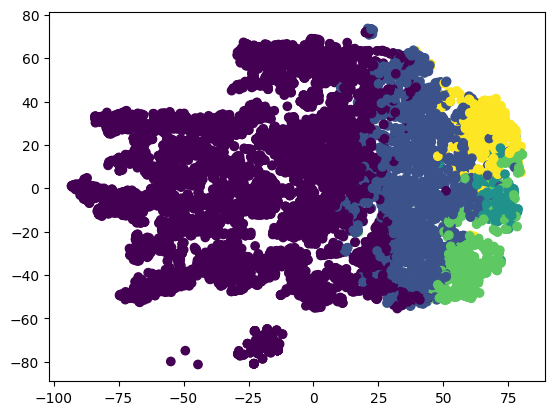

In [40]:
plt.scatter([x[0] for x in two_dimensional_data], [x[1] for x in two_dimensional_data], c=kmeans.labels_[:10000])
plt.show()

k 2
0.6206723435817345


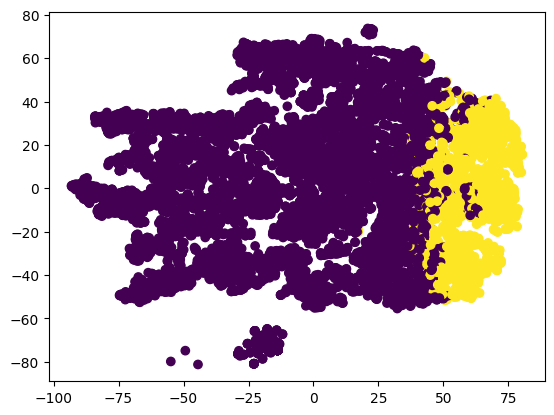

k 3
0.6021078464787479


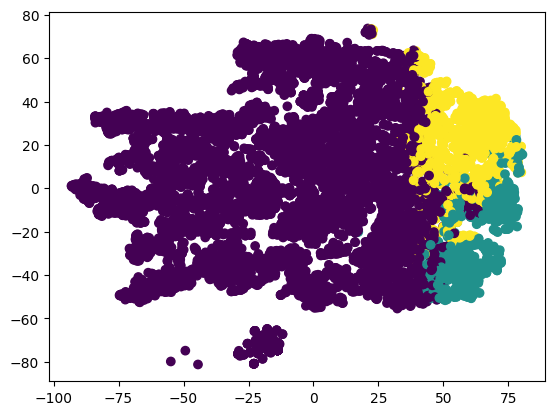

k 4
0.49424410813171743


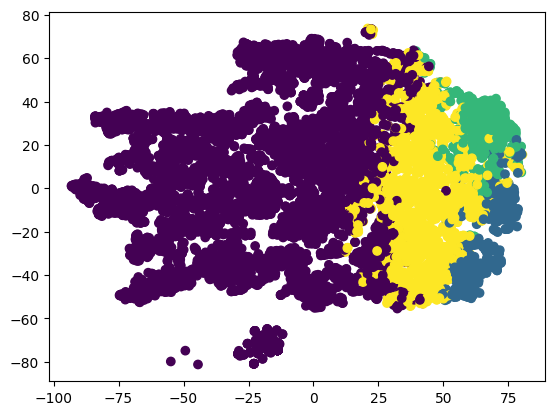

k 5
0.48612633481403866


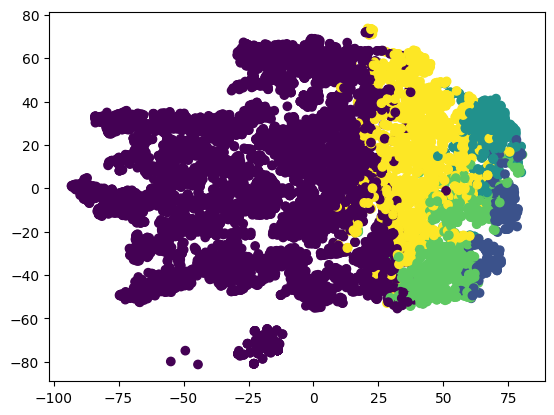

k 6
0.5033896006095734


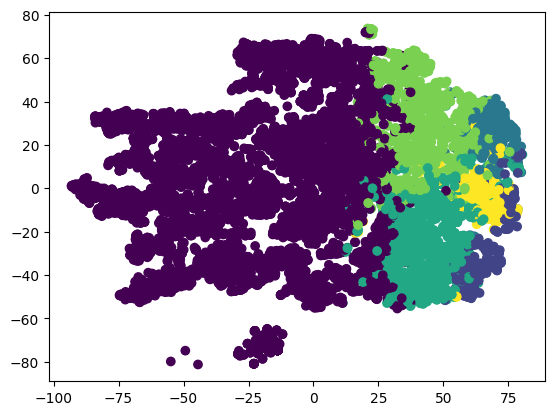

k 7
0.4787983652101024


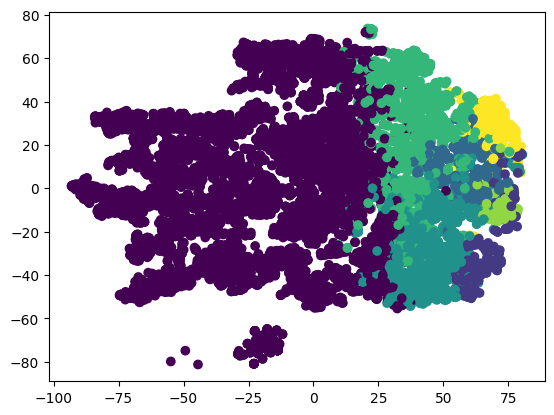

k 8
0.43030697068720763


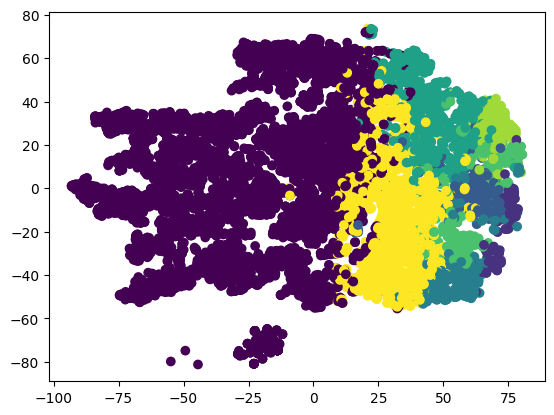

k 9
0.44327229299924104


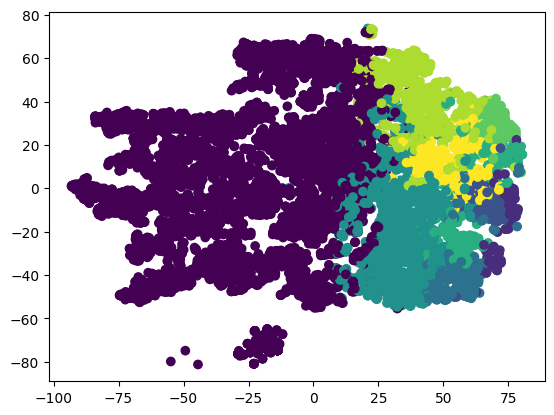

k 10
0.43455415866838404


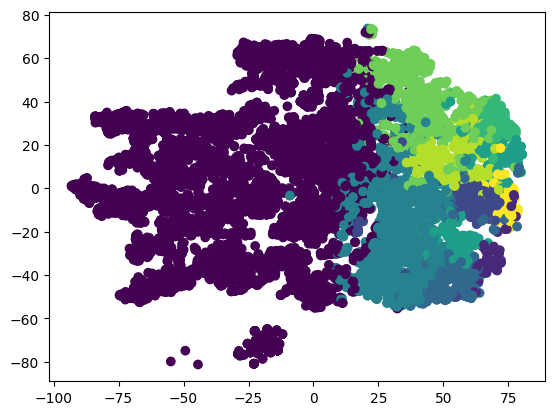

k 11
0.37389790571082093


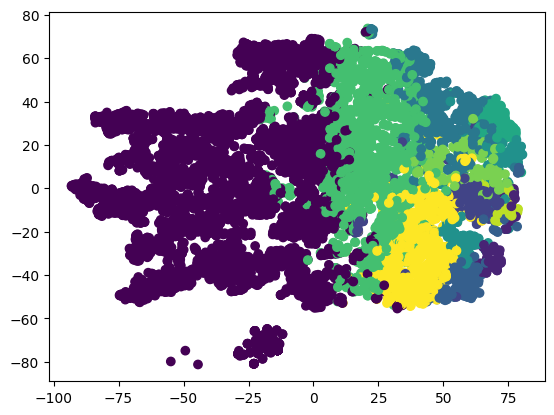

In [42]:
scores = []

for k in range(2, 12):
    print("k", k)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(sample_data)
    score = silhouette_score(sample_data, kmeans.labels_)
    scores.append(score)
    print(score)
    plt.scatter([x[0] for x in two_dimensional_data], [x[1] for x in two_dimensional_data], c=kmeans.labels_)
    plt.show()

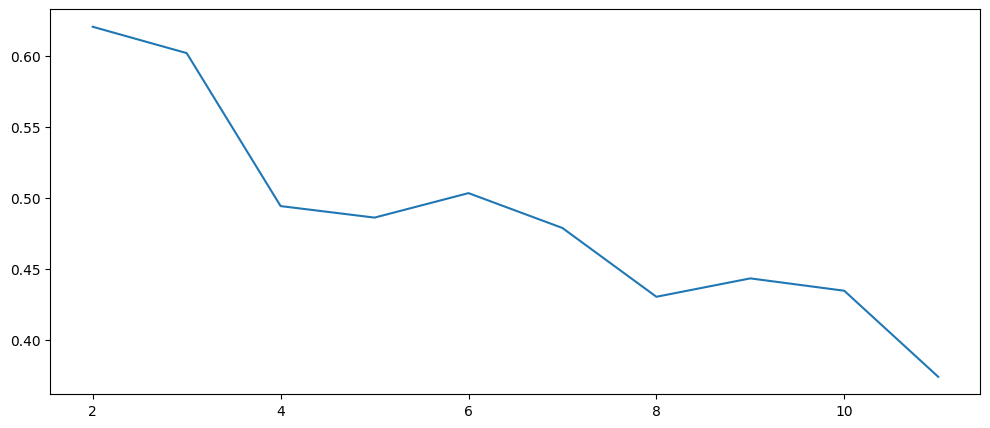

In [45]:
plt.figure(figsize=(12, 5))
plt.plot(range(2, 12), scores)
plt.show()